In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:

arr = np.array([10,13,11,15,12,13,10,11,9])
print(arr)

arr1 = arr[1:] / arr[:-1]
print(arr1)

arr2 = arr[2::2] / arr[:-1:2]
print(arr2)

arr3 = arr[4::4] / arr[:-1:4]
print(arr3)

print(arr1[0]*arr1[1]*arr1[2]*arr1[3])

[10 13 11 15 12 13 10 11  9]
[1.3        0.84615385 1.36363636 0.8        1.08333333 0.76923077
 1.1        0.81818182]
[1.1        1.09090909 0.83333333 0.9       ]
[1.2  0.75]
1.2000000000000002


In [3]:
arr = np.array([3,4,6,5,2,5,6,8,7])
arr1 = arr[1:] / arr[:-1]
print(arr1)
arr2 = arr[2::2] / arr[:-1:2]
print(arr2)

arr1.reshape((4,2,-1))

[1.33333333 1.5        0.83333333 0.4        2.5        1.2
 1.33333333 0.875     ]
[2.         0.33333333 3.         1.16666667]


array([[[1.33333333],
        [1.5       ]],

       [[0.83333333],
        [0.4       ]],

       [[2.5       ],
        [1.2       ]],

       [[1.33333333],
        [0.875     ]]])

In [4]:
df = pd.read_pickle('assets/binance_BTC_USDT.zip')

In [5]:
close = df.close


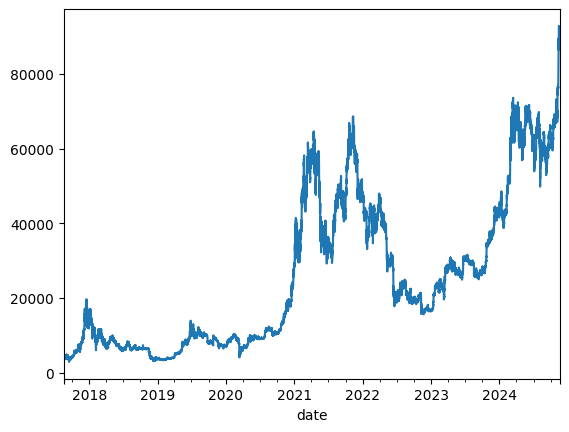

In [6]:
close.plot()
plt.show()

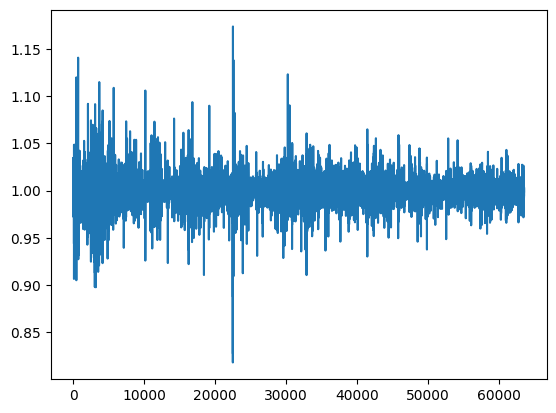

In [7]:
diffs = close.pct_change().dropna().array + 1
plt.plot(diffs)
plt.show()

<NumpyExtensionArray>
[1.0015062093422111, 1.0020925447012041,  1.005929214795287,
 1.0024597757695994, 1.0191047747030861, 1.0036003600360035,
 0.9926681614349776, 0.9963182978338943, 1.0108818861936069,
 1.0026508185691858,
 ...
 0.9926905767994417, 1.0028621123436385,  1.002440528941706,
  0.994105585410977, 0.9972446831679197, 1.0024865588635743,
 1.0036359864931976, 0.9988311473237944, 1.0019377666418738,
 0.9989559320358531]
Length: 63579, dtype: float64
<NumpyExtensionArray>
[
[1.0015062093422111, 1.0020925447012041,  1.005929214795287,
 1.0024597757695994, 1.0191047747030861, 1.0036003600360035,
 0.9926681614349776, 0.9963182978338943, 1.0108818861936069,
 1.0026508185691858,
 ...
 1.0011085935268709, 1.0023117335059302, 0.9996055081924978,
 0.9990820083194779, 0.9991354115477982, 0.9951873635304657,
 1.0026717342575346, 1.0019690660050669, 0.9964762981072985,
 0.9984739449510016],
[0.9984400140452808, 0.9959771661445614, 0.9969522514868309,
   1.00116736411943, 1.0013122427928

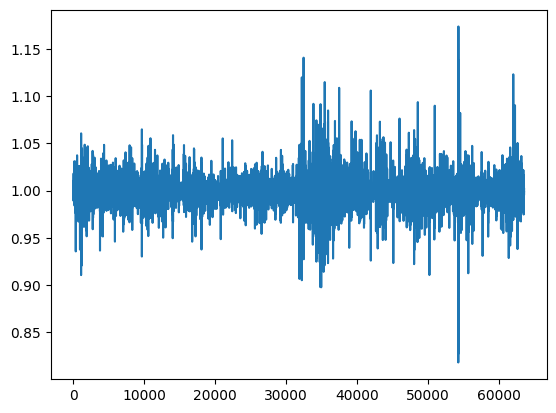

In [8]:
print(diffs)
diffs2 = diffs[:-1].reshape((2,-1))
print(diffs2, diffs2.shape)
diffs2 = np.array([diffs2[1],diffs2[0]])
print(diffs2)
diffs2 = diffs2.reshape(-1)
print(diffs2)
plt.plot(diffs2)
plt.show()

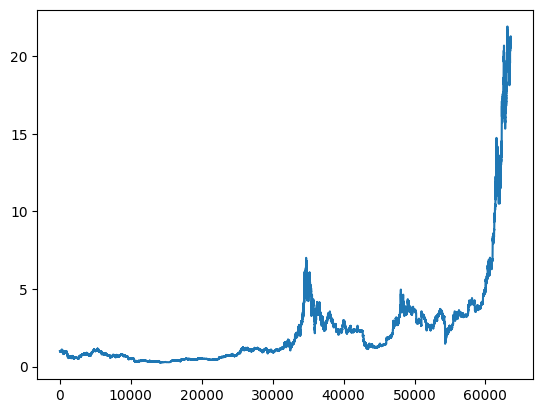

In [9]:
close2 = np.cumprod(diffs2)
plt.plot(close2)
plt.show()

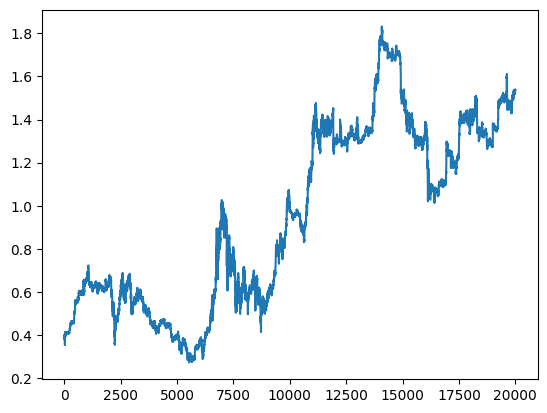

In [175]:
df = pd.read_pickle('assets/binance_BTC_USDT.zip')
close = df.close
diffs = close.pct_change().dropna().array + 1
L0 = len(diffs)

for _ in range(100):
    n = np.random.randint(1, 10)
    nb = 2**n
    L = L0 // nb

    offset = np.random.randint(nb - 1) * L

    p0 = diffs[:offset]
    p1 = diffs[offset : offset + L]
    p2 = diffs[offset + L : offset + 2 * L]
    p3 = diffs[offset + 2 * L:]


    diffs = np.concatenate((p0, p2, p1, p3))
    
    close2 = np.cumprod(diffs)

off = np.random.randint(L0 - 20000)
part = close2[off:off + 20000]
plt.plot(part)
plt.show()